In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("NIFTY.csv")
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,12-JUL-2023,19497.45,19507.70,19361.75,19384.30,327941559,40163.14
1,13-JUL-2023,19495.20,19567.00,19385.80,19413.75,310442517,27244.56
2,14-JUL-2023,19493.45,19595.35,19433.50,19564.50,291165841,25484.44
3,17-JUL-2023,19612.15,19731.85,19562.95,19711.45,268707894,25975.57
4,18-JUL-2023,19787.50,19819.45,19690.20,19749.25,286353897,33269.08


In [3]:
series_shifted = df['Close '].shift()
df['prev_close'] = series_shifted
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),prev_close
0,12-JUL-2023,19497.45,19507.70,19361.75,19384.30,327941559,40163.14,NaN
1,13-JUL-2023,19495.20,19567.00,19385.80,19413.75,310442517,27244.56,19384.30
2,14-JUL-2023,19493.45,19595.35,19433.50,19564.50,291165841,25484.44,19413.75
3,17-JUL-2023,19612.15,19731.85,19562.95,19711.45,268707894,25975.57,19564.50
4,18-JUL-2023,19787.50,19819.45,19690.20,19749.25,286353897,33269.08,19711.45


In [4]:
df.shape

(249, 8)

In [5]:
df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
prev_close         1
dtype: int64

In [6]:
df.dropna(inplace=True)
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),prev_close
1,13-JUL-2023,19495.20,19567.00,19385.80,19413.75,310442517,27244.56,19384.30
2,14-JUL-2023,19493.45,19595.35,19433.50,19564.50,291165841,25484.44,19413.75
3,17-JUL-2023,19612.15,19731.85,19562.95,19711.45,268707894,25975.57,19564.50
4,18-JUL-2023,19787.50,19819.45,19690.20,19749.25,286353897,33269.08,19711.45
5,19-JUL-2023,19802.95,19851.70,19727.45,19833.15,259660464,26447.90,19749.25
...,...,...,...,...,...,...,...,...
244,05-JUL-2024,24213.35,24363.00,24168.85,24323.85,298381204,32052.48,24302.15
245,08-JUL-2024,24329.45,24344.60,24240.55,24320.55,266299131,26356.03,24323.85
246,09-JUL-2024,24351.00,24443.60,24331.90,24433.20,250537091,29361.08,24320.55
247,10-JUL-2024,24459.85,24461.05,24141.80,24324.45,292263786,35358.54,24433.20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 1 to 248
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             248 non-null    object 
 1   Open             248 non-null    float64
 2   High             248 non-null    float64
 3   Low              248 non-null    float64
 4   Close            248 non-null    float64
 5   Shares Traded    248 non-null    int64  
 6   Turnover (₹ Cr)  248 non-null    float64
 7   prev_close       248 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 17.4+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),prev_close
count,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000
mean,21250.908065,21332.344355,21142.505242,21243.842944,3.016460e+08,28838.819919,21223.957258
std,1481.866719,1496.272999,1462.068196,1482.603924,1.058604e+08,10772.723476,1474.281880
min,18928.750000,19041.700000,18837.850000,18857.250000,1.906457e+07,1572.770000,18857.250000
25%,19681.650000,19771.225000,19624.237500,19692.962500,2.358050e+08,22475.532500,19687.537500
50%,21650.425000,21733.925000,21501.075000,21617.375000,2.868950e+08,27038.430000,21594.000000
75%,22347.100000,22448.800000,22238.037500,22343.137500,3.518299e+08,33297.330000,22336.987500
max,24459.850000,24461.050000,24331.900000,24433.200000,1.006105e+09,93786.440000,24433.200000


<Axes: >

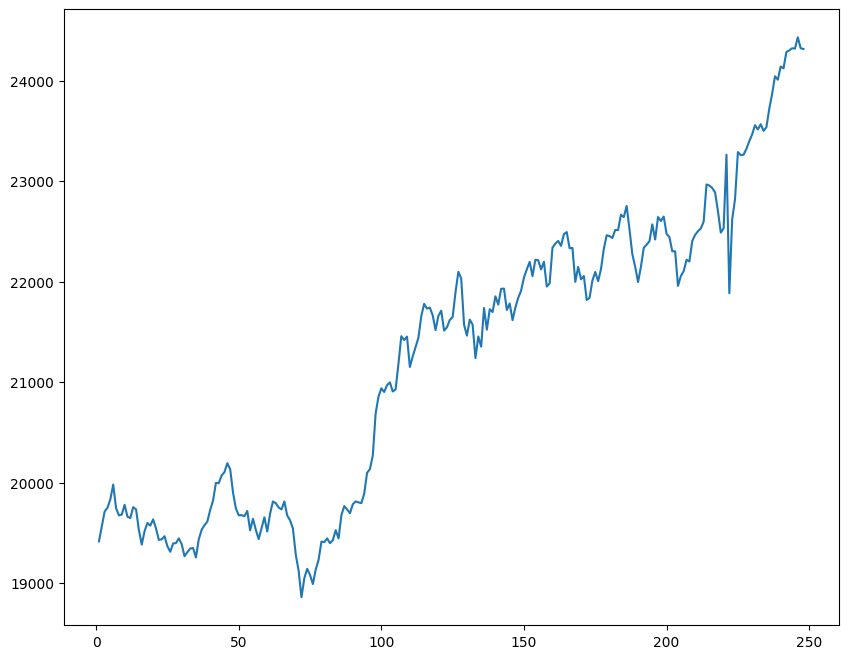

In [9]:
df['Close '].plot(figsize=(10,8))

In [10]:
x = df[['Open ', 'prev_close']]
y = df['Close ']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [12]:
print(x_train.shape, x_test.shape)

(186, 2) (62, 2)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()
regressor.fit (x_train, y_train)

LinearRegression()

In [14]:
print(regressor.coef_)
print(regressor.intercept_)

[0.92490107 0.06596273]
183.5760912754231


In [15]:
predicted = regressor.predict(x_test)
print(x_test)


        Open   prev_close
248  24396.55    24324.45
169  21982.55    21997.70
77   19120.00    18989.15
151  22103.45    22040.70
146  21800.80    21782.50
..        ...         ...
181  22385.70    22453.30
147  21664.30    21616.05
161  22406.95    22338.75
215  22930.75    22967.65
127  22053.15    21894.55

[62 rows x 2 columns]


In [16]:
predicted.shape

(62,)

In [17]:
r_squared = regressor.score(x_test, y_test)
print(f'R-squared: {r_squared:.2f}')

R-squared: 0.99


In [22]:
_df = pd.DataFrame(predicted, columns=['predictions'])
print(_df)

     predictions
0   24352.478487
1   21966.288516
2   19120.260778
3   22080.945452
4   21783.992566
..           ...
57  22369.215003
58  21646.764073
59  22381.313120
60  22907.260263
61  22024.782475

[62 rows x 1 columns]
